<a href="https://colab.research.google.com/github/KatrinFrimus/Introduction-to-cloud-computing/blob/main/HW2_bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
pip install requests beautifulsoup4

In [131]:
!pip install firebase

In [132]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re

In [133]:
def fetch_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

In [134]:
def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1
    return index

In [135]:
def remove_stop_words(index):
    stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at', 'to'}
    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]
    return index

In [136]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count
    return stemmed_index

In [137]:
def search(query, index):

    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    print(query)
    results = {}
    for word in query_words:
        word = stemmer.stem(word)
        if word in index:
            results[word] = index[word]
    return results

In [138]:
def search_engine(url):
    soup = fetch_page(url)
    if soup is None:
        return None
    index = index_words(soup)
    index = remove_stop_words(index)
    index = apply_stemming(index)
    #results = search(query, index)
    sorted_by_values = dict(sorted(index.items(), key=lambda item: item[1], reverse=True))
    #print("Sorted by values:", sorted_by_values)
    return sorted_by_values

In [139]:
import pandas as pd
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm'
results = search_engine(url)
print(results)
df = pd.DataFrame(list(results.items()), columns=['Term', 'Frequency'])
print(df.to_string(index=False))


{'context': 676, 'type': 656, 'also': 648, 'all': 644, 'see': 638, 'keyboard': 631, 'shortcut': 631, 'plan': 626, 'part': 524, 'n': 505, 'of': 378, 'studio': 369, 'assembl': 279, 'draw': 226, 'sketch': 220, 'you': 199, 'that': 189, 'select': 185, 'creat': 174, 'enterpris': 166, 'document': 164, 'is': 162, 'render': 159, 'view': 151, 'simul': 149, 'profession': 145, 'use': 139, 'for': 136, 'tool': 130, 'featur': 118, 'are': 112, 'mate': 109, 'as': 99, 'onshap': 98, 'menu': 98, 'face': 94, 'when': 91, 'can': 89, 'option': 86, 'edg': 86, 'with': 84, 'by': 82, 'panel': 77, 'appear': 76, 'surfac': 75, 'point': 74, 'sheet': 70, 'allow': 67, 'plane': 67, 'thi': 66, 'from': 66, 'your': 65, 'model': 63, 'open': 61, 'be': 59, 'list': 58, 'it': 57, 'which': 55, 'enabl': 55, 'curv': 55, 'display': 53, 's': 52, 'properti': 52, 'tabl': 52, 'one': 51, 'ani': 50, 'dimens': 49, 'shift': 49, 'instanc': 47, 'show': 47, 'color': 47, 'entiti': 47, 'two': 46, 'new': 46, 'connect': 45, 'user': 43, 'line': 42

In [140]:
import datetime
def split_time(record):
    dt = datetime.datetime.strptime(record["Time"], "%Y-%m-%d %H:%M:%S")
    record["Date"] = dt.date().strftime("%Y-%m-%d")
    record["Time"] = dt.time().strftime("%H:%M:%S")
    return record

# Apply the function to each record in the list

# Output the updated data


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#dictionary = json.load(open('/content/drive/My Drive/data.json', 'r'))
#df2 = pd.read_json('/content/drive/My Drive/data.json')
#dic = pd.read_json('/content/drive/My Drive/data.json')
with open('/content/drive/My Drive/data.json', "r") as fid:
     z = json.load(fid)
for record in z:
  split_time(record)
df = pd.DataFrame(z)
print(df)



Mounted at /content/drive
          Time                  Document                   Tab       User  \
0     14:12:54      Industry 4.0 Project                   N/A  StudentA1   
1     14:12:53      Industry 4.0 Project  Part Studio 2 Copy 1  StudentA1   
2     13:27:38      Industry 4.0 Project  Part Studio 2 Copy 1  StudentA1   
3     13:27:37      Industry 4.0 Project  Part Studio 2 Copy 1  StudentA1   
4     13:27:37      Industry 4.0 Project  Part Studio 2 Copy 1  StudentA1   
...        ...                       ...                   ...        ...   
9792  11:42:49  rotation to displacement            Assembly 1  StudentA2   
9793  11:42:48  rotation to displacement                   N/A  StudentA2   
9794  11:42:43  rotation to displacement            Assembly 1  StudentA2   
9795  11:42:42  rotation to displacement            Assembly 1  StudentA2   
9796  11:42:41  rotation to displacement                   N/A  StudentA2   

                                            Descr

In [142]:
from firebase import firebase

firebase = firebase.FirebaseApplication('https://projectgroupbearcloud-default-rtdb.firebaseio.com/', None)
result = firebase.post('/ProjectGroupBearCloud/',z)
print(result)
result = firebase.get('/ProjectGroupBearCloud/', None)
print(result)

{'name': '-O1l5pcdXOSGU2F_BSDu'}
{'-O1l3IHb1kM3xX3Rk2El': [{'Date': '2023-01-13', 'Description': 'Close document', 'Document': 'Industry 4.0 Project', 'Tab': 'N/A', 'Time': '14:12:54', 'User': 'StudentA1'}, {'Date': '2023-01-13', 'Description': 'Tab Part Studio 2 Copy 1 of type PARTSTUDIO closed by StudentA1', 'Document': 'Industry 4.0 Project', 'Tab': 'Part Studio 2 Copy 1', 'Time': '14:12:53', 'User': 'StudentA1'}, {'Date': '2023-01-13', 'Description': 'Hide Right', 'Document': 'Industry 4.0 Project', 'Tab': 'Part Studio 2 Copy 1', 'Time': '13:27:38', 'User': 'StudentA1'}, {'Date': '2023-01-13', 'Description': 'Hide Front', 'Document': 'Industry 4.0 Project', 'Tab': 'Part Studio 2 Copy 1', 'Time': '13:27:37', 'User': 'StudentA1'}, {'Date': '2023-01-13', 'Description': 'Hide Top', 'Document': 'Industry 4.0 Project', 'Tab': 'Part Studio 2 Copy 1', 'Time': '13:27:37', 'User': 'StudentA1'}, {'Date': '2023-01-13', 'Description': 'Hide Origin', 'Document': 'Industry 4.0 Project', 'Tab': 'P

In [143]:
from IPython.display import clear_output
from IPython.display import display
def build_graph(value):
  clear_output(wait=True)
  display(w)
  filter_value = df[value.new].value_counts()
  filter_value.plot(kind='bar')
  plt.title('Number of Operations by '+value.new)
  plt.xlabel(value.new)
  plt.ylabel('Number of Operations')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Dropdown(description='filter:', index=1, options=('Choose a filter', 'Time', 'Document', 'Tab', 'User', 'Date'…

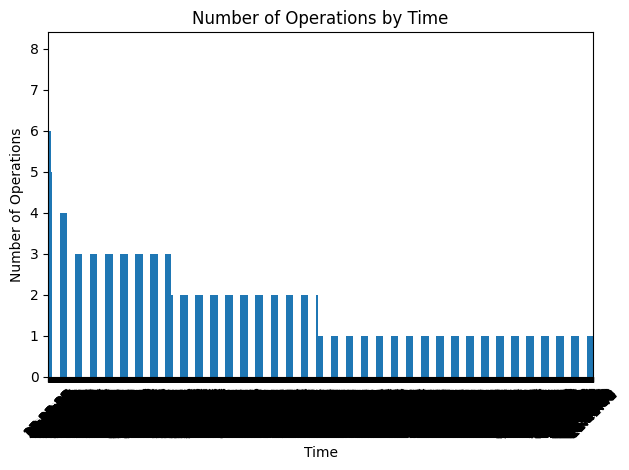

In [144]:
import ipywidgets as widgets
from IPython.display import display
w = widgets.Dropdown(
    options=['Choose a filter','Time','Document','Tab','User','Date'],
    value='Choose a filter',
    description='filter:',
)

w.observe(build_graph,names='value')
display(w)